# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Load DATASET

In [2]:
df=pd.read_csv("Loan.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Pre_Processing

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#Handling Missing Values
df.LoanAmount.fillna(df.LoanAmount.mean(),inplace=True)
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(),inplace=True)
df.Credit_History.fillna(df.Credit_History.mean(), inplace=True)
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [8]:
df.shape

(554, 13)

<AxesSubplot:xlabel='Married', ylabel='count'>

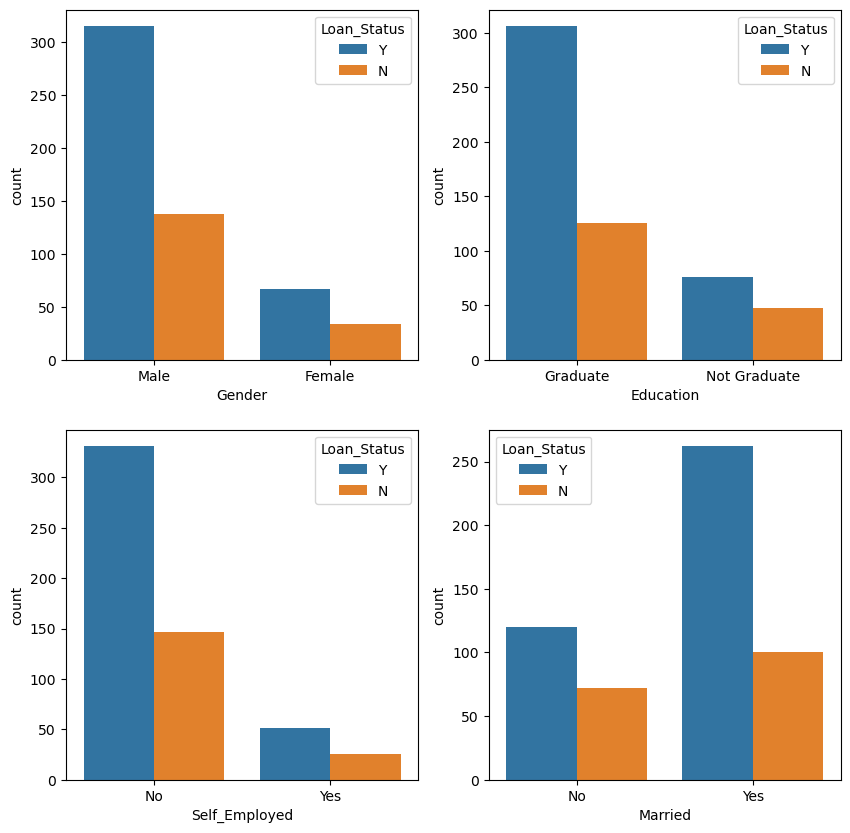

In [9]:
#Data visualization 
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.countplot(x="Gender",hue="Loan_Status",data=df ,ax=axes[0,0],)
sns.countplot(x="Education",hue="Loan_Status",data=df ,ax=axes[0,1])
sns.countplot(x="Self_Employed",hue="Loan_Status",data=df,ax=axes[1,0])
sns.countplot(x="Married",hue="Loan_Status",data=df,ax=axes[1,1])

In [10]:
#Label Encoding
le = LabelEncoder()
cols = df.columns.tolist()
for column in cols:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [11]:
df["Dependents"].replace(to_replace="3+",value="4",inplace=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


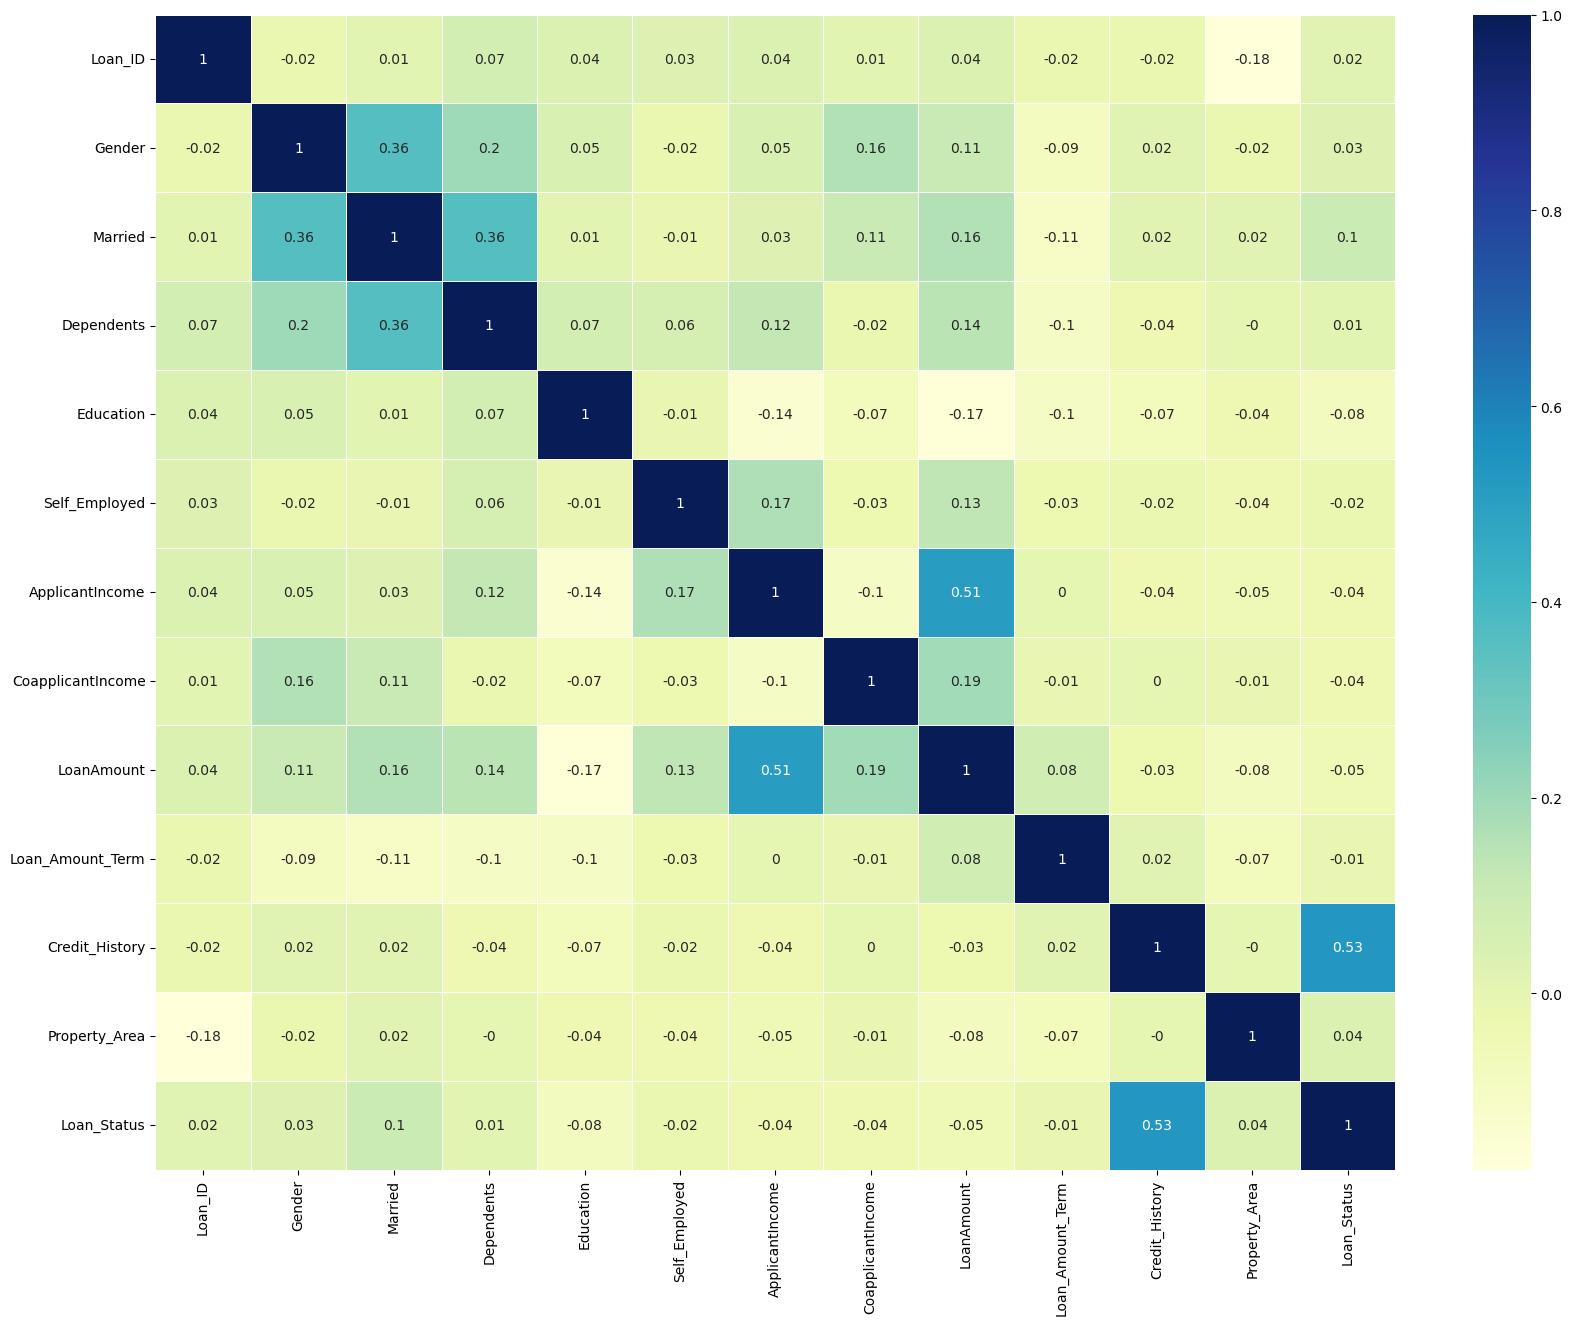

In [12]:
#Data visualization Using HeatMap
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data=df.corr().round(2), annot=True, linewidths=0.7, cmap='YlGnBu')
plt.show()

In [13]:
#Spliting DAta into X and y
X=df.drop(columns=["Loan_ID","Loan_Status"])
y=df[["Loan_Status"]]

In [14]:
#Standard Scaling
sc=StandardScaler()
X=sc.fit_transform(X)

In [15]:
X[0:1,:11]

array([[ 0.47218435, -1.37310475, -0.75244704, -0.53421235, -0.39874279,
         0.10677341, -0.62864652,  0.01781556,  0.27900947,  0.44886807,
         1.23282902]])

# Split Data

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((498, 11), (56, 11), (498, 1), (56, 1))

# Traing Model

In [18]:
mdel = KNeighborsClassifier(n_neighbors =11)
mdel.fit(X_train, y_train)

C:\Users\NOMII\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

In [19]:
model=SVC(kernel="linear" )
model.fit(X_train,y_train)

C:\Users\NOMII\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

# Accuracy 

In [20]:
#Traing Accuracy of KNeighborsClassifier
X_train_pre=mdel.predict(X_train)
traning_data_accr=accuracy_score(X_train_pre,y_train)
traning_data_accr

0.8112449799196787

In [21]:
#Testing Accuracy of KNeighborsClassifier
X_test_pre=mdel.predict(X_test)
testing_data_accr=accuracy_score(X_test_pre,y_test)
testing_data_accr

0.8214285714285714

In [22]:
#Training Accuracy of SVM Model
X_train_pred=model.predict(X_train)
traning_data_accr=accuracy_score(X_train_pred,y_train)
traning_data_accr

0.8052208835341366

In [23]:
#Testing Accuracy of SVM Model
X_test_pred=model.predict(X_test)
testing_data_accr=accuracy_score(X_test_pred,y_test)
testing_data_accr

0.8392857142857143

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr=LogisticRegression()

In [26]:
lr.fit(X_train,y_train)

C:\Users\NOMII\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [27]:
#Training Accuracy of LogisticRegression Model
X_train_prede=lr.predict(X_train)
traning_data_accra=accuracy_score(X_train_prede,y_train)
traning_data_accra

0.8052208835341366

In [28]:
#Testing Accuracy of LogisticRegression Model
X_test_prede=lr.predict(X_test)
testing_data_accra=accuracy_score(X_test_prede,y_test)
testing_data_accra

0.8392857142857143

# Save Model

In [29]:
#save the model to disk

import pickle

pickle_out = open("model.pkl", "wb")

pickle.dump(model, pickle_out)

loaded_model = pickle.load(open("model.pkl", "rb"))

result = loaded_model.score(X_test, y_test)
print(result)

0.8392857142857143
